# Library Loading

In [1]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

# Reading Data

In [2]:
data=pd.read_csv('data_casestudy.csv')

# Basic Data Exploration

In [3]:
data.shape

(70550, 48)

In [49]:
data.head()

,coolant_engineTransmission,owner_number,bonnet_exteriorTyres,engineExhaustSmoke_engineTransmission,lhsRearDoor_exteriorTyres,rhsFrontDoor_exteriorTyres,totalRFC_summary,musicSystemWorksFine_electricalsInterior,allDisplayLightsIsWorkingProperly_electricalsInterior,model,...,lead_id,HVB,isUnderHypothecation_documentDetails,roadTaxPaidInterstate_documentDetails,lhsApron_exteriorTyres,make,toBeScrapped_documentDetails,rating_exteriorTyres,rating_steeringSuspensionBrakes,rhsApron_exteriorTyres
0,No,1,No,COLORLESS,Yes,Yes,39500.0,Yes,Yes,CIVIC,...,1000000199,160000.0,Yes,No,Yes,HONDA,No,3,3,Yes
1,Yes,2,Yes,COLORLESS,Yes,Yes,27500.0,Yes,Yes,RITZ,...,1000000494,130000.0,No,No,Yes,MARUTI SUZUKI,No,2,4,Yes
2,Yes,1,Yes,COLORLESS,Yes,Yes,28000.0,Yes,Yes,EON,...,1000000593,199000.0,No,No,Yes,HYUNDAI,No,3,4,Yes
3,Yes,1,No,COLORLESS,No,No,27200.0,Yes,Yes,FIGO,...,1000000794,104000.0,Yes,No,Yes,FORD,No,3,3,Yes
4,Yes,1,Yes,COLORLESS,Yes,Yes,47500.0,Yes,Yes,VERNA,...,1000002298,412000.0,Yes,No,Yes,HYUNDAI,No,3,4,Yes


In [50]:
data.describe()

,owner_number,totalRFC_summary,rating_engineTransmission,rating_accessoriesFeatures,odometer_reading,rating_airConditioning,number_of_dealers,rating_electricalsInterior,lead_id,HVB,rating_exteriorTyres,rating_steeringSuspensionBrakes
count,70550.000000,70550.000000,70550.000000,70550.000000,7.055000e+04,70550.000000,70550.000000,70550.000000,7.055000e+04,7.055000e+04,70550.000000,70550.000000
mean,1.365103,32670.965485,3.617548,4.805996,6.832707e+04,4.581715,4.977420,3.931269,1.033196e+09,2.618677e+05,3.007229,3.872856
std,0.602005,16430.398454,0.789202,0.461653,4.108662e+04,0.760665,3.197264,0.716558,2.486895e+07,2.064557e+05,0.596810,0.839681
min,1.000000,1000.000000,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.000000,1.000000e+09,1.200000e+04,1.000000,1.000000
25%,1.000000,21000.000000,3.000000,5.000000,3.978125e+04,4.000000,2.000000,3.000000,1.015155e+09,1.260000e+05,3.000000,3.000000
50%,1.000000,30500.000000,4.000000,5.000000,6.369450e+04,5.000000,4.000000,4.000000,1.030066e+09,2.140000e+05,3.000000,4.000000
75%,2.000000,41500.000000,4.000000,5.000000,8.887100e+04,5.000000,7.000000,4.000000,1.043622e+09,3.360000e+05,3.000000,5.000000
max,5.000000,440703.000000,5.000000,5.000000,1.389567e+06,5.000000,25.000000,5.000000,1.129975e+09,2.550000e+06,5.000000,5.000000


# Looking into Dependent Variable

In [48]:
data['HVB'].describe()

count    7.055000e+04
mean     2.618677e+05
std      2.064557e+05
min      1.200000e+04
25%      1.260000e+05
50%      2.140000e+05
75%      3.360000e+05
max      2.550000e+06
Name: HVB, dtype: float64

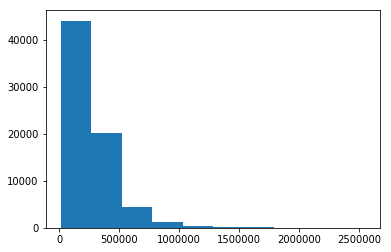

In [4]:
plt.hist(data['HVB'])  # arguments are passed to np.histogram
plt.show()

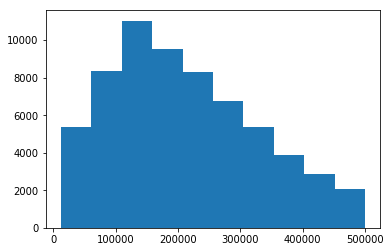

In [5]:
plt.hist(data['HVB'][data.HVB<=500000])  # arguments are passed to np.histogram
plt.show()

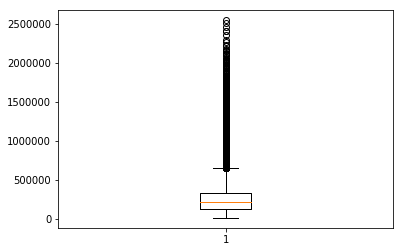

In [6]:
plt.boxplot(data['HVB'])
plt.show()

# Missing Value Treatement

In [7]:
(data.isnull().mean() * 100).sort_values(ascending=False)

autoClimateControl_airConditioning                          76.063785
reverseCameraParkingSensor_electricalsInterior              69.475549
powerWindowWorkingProperly_electricalsInterior              10.834869
musicSystemWorksFine_electricalsInterior                     4.165840
clutchOperatesSmoothlyWithoutSlipping_engineTransmission     2.114812
heaterOperationIsNormalAndEffective_airConditioning          0.962438
acCoolingIsNormal_airConditioning                            0.612332
acFanAndCompressorNoiseIsNormal_airConditioning              0.609497
fuel_type                                                    0.000000
roadTaxPaidInterstate_documentDetails                        0.000000
make                                                         0.000000
model                                                        0.000000
variant                                                      0.000000
doorFunctionsProperly_electricalsInterior                    0.000000
allDisplayLightsIsWo

### Removed Columns which is having more than 15% missing values

In [8]:
new_col=list(set(list(data.columns))-set(['autoClimateControl_airConditioning','reverseCameraParkingSensor_electricalsInterior','powerWindowWorkingProperly_electricalsInterior']))

In [9]:
data=data[new_col]

## Separating the numeric and categorical variable

In [10]:
cols = data.columns
num_cols = data._get_numeric_data().columns
numeric_var=data[num_cols]
cat_var=data[list(set(cols)-set(num_cols))]

### Removed Column which is having more than 100 levels in Catagorical variable

In [11]:
cat_var=data[list(set((cat_var.columns))-set(['variant']))]

# Imputing the missing value

In [13]:
for i in numeric_var.columns:
    mean_value=numeric_var[i].mean()
    numeric_var[i]=numeric_var[i].fillna(mean_value)

In [14]:
(numeric_var.isnull().mean() * 100).sort_values(ascending=False)

rating_steeringSuspensionBrakes    0.0
rating_exteriorTyres               0.0
HVB                                0.0
lead_id                            0.0
rating_electricalsInterior         0.0
number_of_dealers                  0.0
rating_airConditioning             0.0
odometer_reading                   0.0
rating_accessoriesFeatures         0.0
rating_engineTransmission          0.0
totalRFC_summary                   0.0
owner_number                       0.0
dtype: float64

In [16]:
for i in cat_var.columns:
    mode_value=cat_var[i].mode()
    cat_var[i]=cat_var[i].fillna(mode_value[0])

In [18]:
(cat_var.isnull().mean() * 100).sort_values(ascending=False)

rhsApron_exteriorTyres                                      0.0
rhsRearDoor_exteriorTyres                                   0.0
bonnet_exteriorTyres                                        0.0
engineExhaustSmoke_engineTransmission                       0.0
lhsRearDoor_exteriorTyres                                   0.0
rhsFrontDoor_exteriorTyres                                  0.0
musicSystemWorksFine_electricalsInterior                    0.0
allDisplayLightsIsWorkingProperly_electricalsInterior       0.0
model                                                       0.0
interstateNocIssued_documentDetails                         0.0
clutchOperatesSmoothlyWithoutSlipping_engineTransmission    0.0
batteryPerformanceSatisfactory_engineTransmission           0.0
lhsFrontDoor_exteriorTyres                                  0.0
engineExcessiveBlowByOrBack_engineTransmission              0.0
engineOil_engineTransmission                                0.0
doorFunctionsProperly_electricalsInterio

## Outlier Treatement for Numeric Variable

In [15]:
for i in numeric_var.columns:
    numeric_var.loc[numeric_var[i]>numeric_var[i].mean()+(3*numeric_var[i].std()),i]=np.percentile(numeric_var[i],95)

In [17]:
del cat_var['inspection_date']

In [19]:
cat_var=pd.get_dummies(cat_var)

In [20]:
model_data=pd.concat([numeric_var,cat_var],axis=1)

In [21]:
model_data.shape

(70550, 167)

# Fitting Linear Model

In [22]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(model_data, test_size=0.3)

In [23]:
from sklearn import linear_model

In [24]:
lm=linear_model.LinearRegression()

In [25]:
new_data=list(set(model_data.columns)-set(['HVB','inspection_date']))#columns

In [26]:
X=train[new_data]

In [27]:
y=train['HVB']

In [ ]:
model=lm.fit(X,y)

In [28]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    HVB   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1801.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        00:09:02   Log-Likelihood:            -6.2295e+05
No. Observations:               49385   AIC:                         1.246e+06
Df Residuals:                   49264   BIC:                         1.247e+06
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

# Droped column by checking P-Value by iterating Process

In [29]:
del X['engineExhaustSmoke_engineTransmission_BLUE']

del X['rating_airConditioning']

del X['rhsFrontDoor_exteriorTyres_Yes']
del X['toBeScrapped_documentDetails_No']
del X['totalRFC_summary']
del X['rhsRearDoor_exteriorTyres_Yes']
del X['model_SUNNY']
del X['bonnet_exteriorTyres_Yes']
del X['model_AMAZE']
del X['model_ACCORD']
del X['rhsApron_exteriorTyres_Yes']
del X['model_INDICA VISTA']
del X['doorFunctionsProperly_electricalsInterior_No']
del X['heaterOperationIsNormalAndEffective_airConditioning_Yes']
del X['model_EECO']
del X['engineExhaustSmoke_engineTransmission_COLORLESS']
del X['engineExcessiveBlowByOrBack_engineTransmission_Yes']

del X['toBeScrapped_documentDetails_Yes']
del X['model_MANZA']
del X['lhsRearDoor_exteriorTyres_Yes']
del X['model_SX4']
del X['interstateNocIssued_documentDetails_No']
del X['coolant_engineTransmission_No']
del X['rhsApron_exteriorTyres_No']
del X['lhsApron_exteriorTyres_Yes']
del X['engineExcessiveBlowByOrBack_engineTransmission_No']
del X['lhsFrontDoor_exteriorTyres_Yes']

del X['model_RAPID']
del X['lhsApron_exteriorTyres_No']
del X['acCoolingIsNormal_airConditioning_Yes']
del X['isChassisPlateAvailable_exteriorTyres_Yes']
del X['model_THAR']
del X['musicSystemWorksFine_electricalsInterior_Yes']

del X['clutchOperatesSmoothlyWithoutSlipping_engineTransmission_Yes']
del X['engineSoundIsNormal_engineTransmission_No']
del X['gearShiftingWorksProperly_engineTransmission_Yes']
del X['model_SCORPIO']
del X['acFanAndCompressorNoiseIsNormal_airConditioning_No']
del X['acFanAndCompressorNoiseIsNormal_airConditioning_Yes']
del X['gearShiftingWorksProperly_engineTransmission_No']

del X['engineSoundIsNormal_engineTransmission_Yes']
del X['clutchOperatesSmoothlyWithoutSlipping_engineTransmission_No']
del X['bothOutsideRearViewMirrorsAreOk_exteriorTyres_Yes']
del X['batteryPerformanceSatisfactory_engineTransmission_No']
del X['engineOil_engineTransmission_Yes']
del X['rearDefoggerWorkProperly_exteriorTyres_Yes']
del X['engineExhaustSmoke_engineTransmission_WHITE']

In [31]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    HVB   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2072.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        00:09:03   Log-Likelihood:            -6.2301e+05
No. Observations:               49385   AIC:                         1.246e+06
Df Residuals:                   49280   BIC:                         1.247e+06
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [66]:
f = open('p-value.csv','w')
f.write(est2.summary().as_csv())
f.close()

In [33]:
X.shape

(49385, 119)

In [34]:
model=lm.fit(X,y)

In [35]:
prediction=lm.predict(test[X.columns])

prediction=pd.Series(prediction)

predicted=pd.concat([prediction,test['HVB'].reset_index()['HVB']],axis=1)


MAPE = 100*(abs(predicted[0]-predicted["HVB"])/predicted["HVB"]).mean()
print(MAPE)

31.57101201902069


# Droping Column by checking VIF by Iterating Process

In [36]:
def VIF_Calculation(data):
    data.dropna()
    data = data._get_numeric_data()
    data=data.loc[:, (data != 0).any(axis=0)]
    X=data.copy()
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    #vif.to_csv('VIF.csv',sep=',', index=False)
    return vif.sort_values('VIF Factor',ascending=False)

In [37]:
del X['model_LINEA']
del X['model_GRAND PUNTO']
del X['model_GO']
del X['make_AUDI']
del X['model_ETIOS']
del X['model_FIESTA CLASSIC']
del X['model_GETZ PRIME']
del X['model_A4']
del X['make_BMW']

del X['model_KWID']
del X['model_CAPTIVA']
del X['fuel_type_Petrol']
del X['allDisplayLightsIsWorkingProperly_electricalsInterior_Yes']
del X['roadTaxPaidInterstate_documentDetails_No']
del X['make_VOLKSWAGEN']
del X['rearDefoggerWorkProperly_exteriorTyres_No']
del X['isUnderHypothecation_documentDetails_No']
del X['batteryPerformanceSatisfactory_engineTransmission_Yes']
del X['model_BEAT']

del X['make_MARUTI SUZUKI']
del X['make_HYUNDAI']
del X['rating_accessoriesFeatures']
del X['rating_electricalsInterior']
del X['rating_engineTransmission']
del X['doorFunctionsProperly_electricalsInterior_Yes']
del X['model_I10']

del X['rating_steeringSuspensionBrakes']
del X['make_FORD']
del X['make_HONDA']
del X['owner_number']
del X['coolant_engineTransmission_Yes']

del X['rating_exteriorTyres']
del X['make_TOYOTA']
del X['make_MAHINDRA']

del X['make_NISSAN']
del X['interstateNocIssued_documentDetails_Yes']
del X['model_AVEO U VA']
del X['model_AVEO']
del X['model_CIVIC']
del X['model_OPTRA MAGNUM']
del X['model_WAGON R 1.0']
del X['lead_id']

In [39]:
VIF_Calculation(X)

,VIF Factor,features
30,4.816199,odometer_reading
46,4.187697,make_TATA
9,3.755894,fuel_type_Diesel
55,3.238734,model_NANO
43,2.960285,model_DUSTER
25,2.920740,make_RENAULT
54,2.852342,number_of_dealers
64,2.796544,make_SKODA
71,1.980534,make_CHEVROLET
65,1.929123,model_SUPERB


In [40]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    HVB   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     2200.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        00:10:22   Log-Likelihood:            -6.2775e+05
No. Observations:               49385   AIC:                         1.256e+06
Df Residuals:                   49307   BIC:                         1.256e+06
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [45]:
model=lm.fit(X,y)

In [46]:
prediction=lm.predict(test[X.columns])

prediction=pd.Series(prediction)

predicted=pd.concat([prediction,test['HVB'].reset_index()['HVB']],axis=1)


MAPE = 100*(abs(predicted[0]-predicted["HVB"])/predicted["HVB"]).mean()
print(MAPE)

34.0131085608043


In [42]:
stdres=pd.DataFrame(est2.resid_pearson)

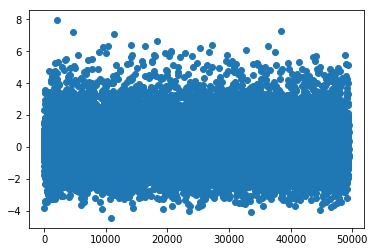

In [43]:
fig=plt.plot(stdres,'o',ls='None')

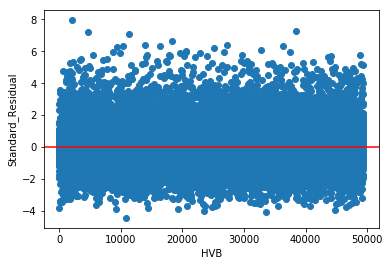

In [44]:
fig=plt.plot(stdres,'o',ls='None')
l=plt.axhline(y=0,color='r')
plt.ylabel('Standard_Residual')
plt.xlabel('HVB')
print(fig)

# Multicollinearity Check

In [47]:
VIF_Calculation(X)

,VIF Factor,features
30,4.816199,odometer_reading
46,4.187697,make_TATA
9,3.755894,fuel_type_Diesel
55,3.238734,model_NANO
43,2.960285,model_DUSTER
25,2.920740,make_RENAULT
54,2.852342,number_of_dealers
64,2.796544,make_SKODA
71,1.980534,make_CHEVROLET
65,1.929123,model_SUPERB


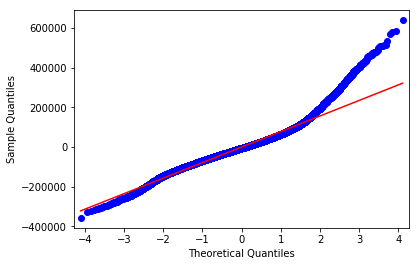

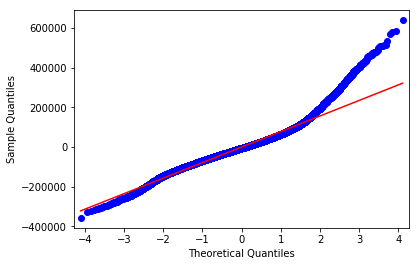

In [41]:
sm.qqplot(est2.resid,line='r')